In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import csv
from keras.layers import *
from keras import optimizers

In [2]:
o=pd.read_csv('/content/sample_data/mnist_train_small.csv')
p=pd.read_csv('/content/sample_data/mnist_test.csv')

In [3]:
o.head(10)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
p.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
o.shape

(19999, 785)

In [6]:
f=o.iloc[:,1:785]
l=o.iloc[:,0]

In [7]:
set(l)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
sum(f.isnull().sum())

0

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(f, l, test_size = 0.2)

In [10]:
X_train = np.array(X_train)
X_cv = np.array(X_cv)

In [11]:
print((min(X_train[1]), max(X_train[1])))

(0, 255)


In [12]:
X_train.shape

(15999, 784)

In [15]:
model=Sequential([Dense(units=300, activation='relu'),
                  Dense(units=150, activation='relu'),
                  Dense(units=180, activation='linear'),
                  Dense(10, activation='softmax')])

In [16]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [19]:
hist=model.fit(X_train, y_train,epochs=50,validation_data=(X_cv, y_cv))

Epoch 1/50
500/500 [==============================] - 6s 10ms/step - loss: 3.3347 - accuracy: 0.8210 - val_loss: 0.5498 - val_accuracy: 0.8815
Epoch 2/50
500/500 [==============================] - 6s 11ms/step - loss: 0.3899 - accuracy: 0.9044 - val_loss: 0.5976 - val_accuracy: 0.8750
Epoch 3/50
500/500 [==============================] - 4s 9ms/step - loss: 0.3414 - accuracy: 0.9194 - val_loss: 0.4414 - val_accuracy: 0.9075
Epoch 4/50
500/500 [==============================] - 6s 12ms/step - loss: 0.2879 - accuracy: 0.9291 - val_loss: 0.4376 - val_accuracy: 0.9078
Epoch 5/50
500/500 [==============================] - 5s 9ms/step - loss: 0.2971 - accuracy: 0.9301 - val_loss: 0.5279 - val_accuracy: 0.8888
Epoch 6/50
500/500 [==============================] - 4s 9ms/step - loss: 0.2735 - accuracy: 0.9376 - val_loss: 0.7815 - val_accuracy: 0.8813
Epoch 7/50
500/500 [==============================] - 6s 12ms/step - loss: 0.2980 - accuracy: 0.9354 - val_loss: 0.5862 - val_accuracy: 0.9090
Ep

In [20]:
x_test=p.iloc[:,0:784]
ans=model.predict(x_test)
ans=list(ans)
for x in range(len(ans)):
  ans[x]=list(ans[x])
for x in range(len(ans)):
  ans[x]=ans[x].index(max(ans[x]))
ans=np.array(ans)
ans

313/313 [==============================] - 1s 3ms/step


array([2, 1, 0, ..., 4, 5, 6])

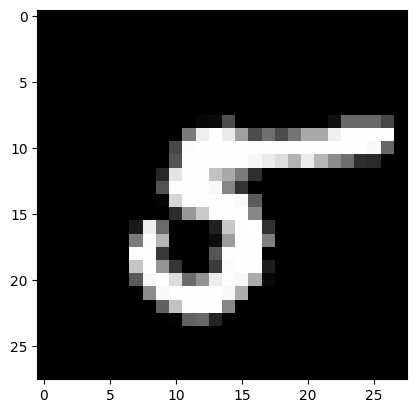

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
sample = -2
image = X_test[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

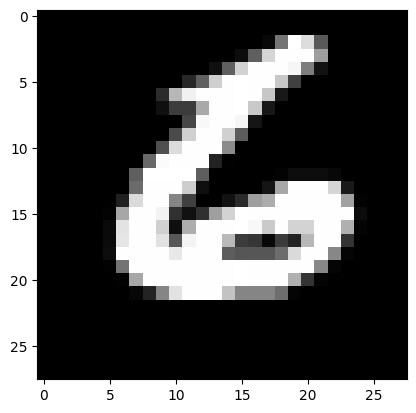

In [25]:
sample2=-1
image = X_test[sample2]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()